In [94]:
## Import functions for Data Scraping, Treatment and Plotting

## System
import re
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## EDA
import numpy as np
import pandas as pd

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [95]:
## IMPORT DATA FROM CSV FILE
def ImportData(team_file):
    folder = team_file + '/'
    maps_file = team_file + '_economy_MAPS.csv'
    matches_file = team_file + '_economy_MATCHES.csv'
    
    maps = pd.read_csv(CSV_PATH + folder + maps_file)
    matches = pd.read_csv(CSV_PATH + folder + matches_file)

    return maps.fillna(0), matches.fillna(0)

def FilterTeam(df, teams):
    return df[df["Team"].isin(teams)].reset_index(drop=True)

def FilterOppTeam(df, opp_teams):
    return df[df["Opp_team"].isin(opp_teams)].reset_index(drop=True)

def FilterMap(df, maps):
    return df[df["Map"].isin(maps)].reset_index(drop=True)

def AllTeamsMaps(files, teams):
    concat = pd.concat([ImportData(team_file)[0] for team_file in files])
    filter = FilterTeam(concat, teams)
    filter.Team[filter.Team == 'NOORG2.0'] = 'paiN'
    filter.Team[filter.Team == 'Mix'] = 'IMP'
    filter.Team[filter.Team == 'NMDM'] = 'Ingaming'
    filter.Team[filter.Team == 'FF'] = 'VORA'
    return filter

def AllTeamsMatches(files, teams):
    concat = pd.concat([ImportData(team_file)[1] for team_file in files])
    filter = FilterTeam(concat, teams)
    filter.Team[filter.Team == 'NOORG2.0'] = 'paiN'
    filter.Team[filter.Team == 'Mix'] = 'IMP'
    filter.Team[filter.Team == 'NMDM'] = 'Ingaming'
    filter.Team[filter.Team == 'FF'] = 'VORA'
    return filter

def Preprocessamento(team, team_file):
    ## Import data
    maps, matches = ImportData(team_file)

    ## Filter Team
    matches = FilterTeam(matches, team)
    maps = FilterTeam(maps, team)

    ## Padrozinar nome do time
    maps.Team  = team_file
    matches.Team  = team_file

    return maps, matches

##----------------------PLOT FUNCS

## Box Plot of Econ by Map
def BoxplotEconMap(df, buy_col):
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=df['Map'], y=df[buy_col], order=df['Map'].sort_values().unique())

## Box Plot of Econ by Opp
def BoxplotEconOpp(df, buy_col):
    df = FilterOppTeam(df, ALL_TEAMS)
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=df['Opp_team'], y=df[buy_col], order=df['Opp_team'].sort_values().unique())
    
def HistEconMaps(df , buy_col):
    g = sns.displot(data=df, x=buy_col, col='Map', kde=True)
    g.set_titles("{col_name}")

In [96]:
## TEAMS: ['GL', 'IMP', 'Mix', 'HAVAN', 'Ingaming', 'NMDM', 'VKS', 'FF', 'VORA', 'BD', 'paiN', 'NOORG2.0']
    # 'IMP' =  'Mix'; 'Ingaming' = 'NMDM'; 'FF' = 'VORA'; 'paiN' = 'NOORG2.0'
## team_files: gamlanders, pain, vorax, havan, imperial, ingaming, vikings, black_dragons
CSV_PATH = '../data/csv/'
EXCEL_PATH = '..data/excel/'

TEAM = ['paiN',  'NOORG2.0']
TEAM_FILE = 'pain'

ALL_FILES = ['gamelanders', 'pain', 'vorax', 'havan', 'imperial', 'ingaming', 'vikings', 'black_dragons']
ALL_TEAMS = ['GL', 'IMP', 'Mix', 'HAVAN', 'Ingaming', 'NMDM', 'VKS', 'FF', 'VORA', 'BD', 'paiN', 'NOORG2.0']
MAPS = ['ASCENT', 'BIND', 'HAVEN', 'ICEBOX', 'SPLIT']

In [97]:
all_maps = AllTeamsMaps(ALL_FILES, ALL_TEAMS)
all_matches = AllTeamsMatches(ALL_FILES, ALL_TEAMS)

In [98]:
all_maps.Team.unique()

array(['GL', 'IMP', 'VORA', 'VKS', 'paiN', 'Ingaming', 'BD', 'HAVAN'],
      dtype=object)

In [99]:
maps, matches = Preprocessamento(TEAM, TEAM_FILE)

In [100]:
maps.head()

,Team,Pistol_W,Pistol_P,Pistol_WR,Eco_0_5_P,Eco_0_5_W,Eco_0_5_WR,Semi_Eco_5_10_P,Semi_Eco_5_10_W,Semi_Eco_5_10_WR,...,Semi_Buy_10_20_W,Semi_Buy_10_20_WR,Full_Buy_20_P,Full_Buy_20_W,Full_Buy_20_WR,Opp_team,Num_maps,Patch,match_id,Map
0,pain,2,2,100.0,2,2,100.0,0,0,0.0,...,3,100.0,13,8,62.0,IMP,1.0,0.00,6527,ASCENT
1,pain,1,2,50.0,3,1,33.0,2,0,0.0,...,1,33.0,15,8,53.0,IMP,1.0,0.00,6527,SPLIT
2,pain,0,2,0.0,3,0,0.0,1,0,0.0,...,4,67.0,11,4,36.0,IMP,1.0,0.00,6527,HAVEN
3,pain,2,2,100.0,2,2,100.0,0,0,0.0,...,5,62.0,10,6,60.0,ITZA,1.0,1.12,6054,BIND
4,pain,2,2,100.0,2,2,100.0,0,0,0.0,...,2,67.0,10,9,90.0,ITZA,1.0,1.12,6054,HAVEN


/home/gabrielperson/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


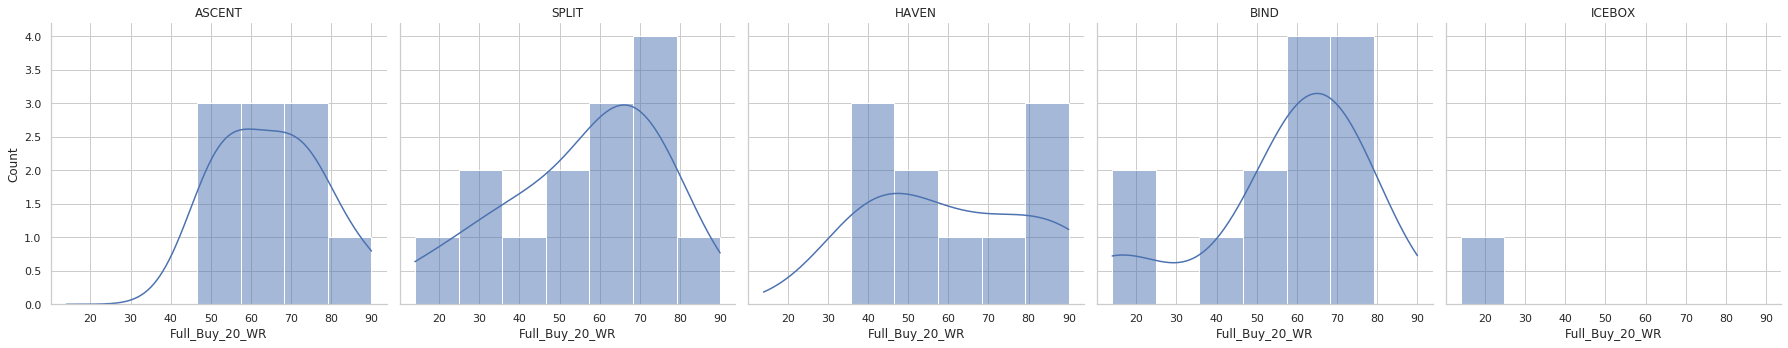

In [78]:
HistEconMaps(maps, 'Full_Buy_20_WR')

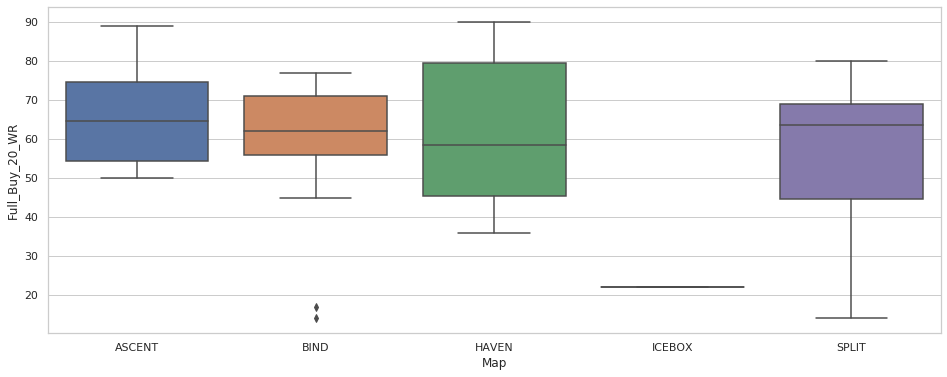

In [68]:
BoxplotEconMap(maps,'Full_Buy_20_WR')

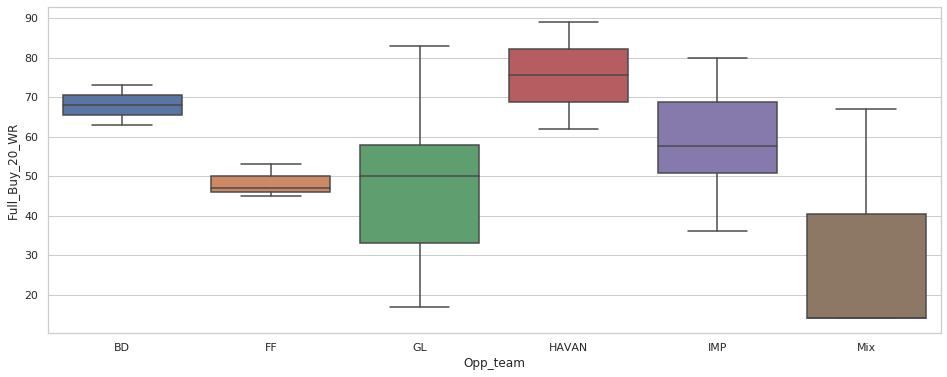

In [77]:
BoxplotEconOpp(maps,'Full_Buy_20_WR')